# What Is Sentiment Analysis?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

# Types of Sentiment Analysis

Sentiment analysis focuses on the polarity of a text (positive, negative, neutral) but it also goes beyond polarity to detect specific feelings and emotions (angry, happy, sad, etc), urgency (urgent, not urgent) and even intentions (interested v. not interested).

Depending on how you want to interpret customer feedback and queries, you can define and tailor your categories to meet your sentiment analysis needs. In the meantime, here are some of the most popular types of sentiment analysis:

1. Graded Sentiment Analysis
2. Emotion detection
3. Aspect-based Sentiment Analysis
4. Multilingual sentiment analysis




# Why Is Sentiment Analysis Important?

Since humans express their thoughts and feelings more openly than ever before, sentiment analysis is fast becoming an essential tool to monitor and understand sentiment in all types of data.

Automatically analyzing customer feedback, such as opinions in survey responses and social media conversations, allows brands to learn what makes customers happy or frustrated, so that they can tailor products and services to meet their customers’ needs.

---

For sentiment analysis, I used Lakme product evaluations from customers using Nykaa, followed by data cleaning and Exploratory Data Analysis (EDA) to obtain findings.



**Import Libraries**


In [42]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

**Reading the dataset**

In [4]:
from google.colab import files
uploaded= files.upload()

Saving Lakme Product Review - Sheet1.csv to Lakme Product Review - Sheet1.csv


**Import File**

In [30]:
df = pd.read_csv("Lakme Product Review - Sheet1.csv", encoding = 'unicode_escape')
df.head(6900)

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,995305,Lakme,15863853,Not satisfied,It's a first time that I'm very disappointed w...,Payal Meshram,11/29/20 12:57,1,True,False,Verified Buyer,Lakme Eye-conic Eyes Combo,750,630,3.9,9648,NaN,https://www.nykaa.com/lakme-eye-conic-eyes-com...
1,995305,Lakme,15817682,Lakme eye conic liner,pathetic liner . Dont order . No stay at all ....,Anushka Chawla,11/27/20 15:17,1,True,False,Verified Buyer,Lakme Eye-conic Eyes Combo,750,630,3.9,9648,NaN,https://www.nykaa.com/lakme-eye-conic-eyes-com...
2,995305,Lakme,19752721,Nice quality,Is ok but the look of the product is perfect. ...,EKRA,7/29/21 14:42,4,False,False,NaN,Lakme Eye-conic Eyes Combo,750,630,3.9,9648,NaN,https://www.nykaa.com/lakme-eye-conic-eyes-com...
3,995305,Lakme,23434117,Eye-conic combo,Liner is smudge and water proof but mascara is...,priyanka srivastav,3/16/22 10:28,4,False,False,NaN,Lakme Eye-conic Eyes Combo,750,630,3.9,9648,NaN,https://www.nykaa.com/lakme-eye-conic-eyes-com...
4,995305,Lakme,22515447,Good mascara.,This mascara is gives good effect on the eyes ...,preeti kumari,1/20/22 20:07,4,False,False,NaN,Lakme Eye-conic Eyes Combo,750,630,3.9,9648,NaN,https://www.nykaa.com/lakme-eye-conic-eyes-com...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,1017,Lakme,2593818,Love it,It spreads so beautifully. Goes with any colou...,Dr sowmya,8/9/18 14:14,5,False,False,NaN,Lakme Lip Gloss,200,200,4.0,1363,NaN,https://www.nykaa.com/lakme-lip-gloss/p/1017
6896,1017,Lakme,2580472,loved it,It keeps my lips hydrated... N the smell is awsm,rimsi sangma,8/7/18 11:49,5,False,False,NaN,Lakme Lip Gloss,200,200,4.0,1363,NaN,https://www.nykaa.com/lakme-lip-gloss/p/1017
6897,1017,Lakme,2321711,BubblegumÃ¢ÂÂ¤Ã¯Â¸Â,I use this gloss since my college days.. N sti...,Sneha Nagare,7/8/18 21:27,5,False,False,NaN,Lakme Lip Gloss,200,200,4.0,1363,NaN,https://www.nykaa.com/lakme-lip-gloss/p/1017
6898,1017,Lakme,2023652,ausome product,It gives shine to our lips and increases the c...,sandhya rani,6/3/18 22:07,5,False,False,NaN,Lakme Lip Gloss,200,200,4.0,1363,NaN,https://www.nykaa.com/lakme-lip-gloss/p/1017


**Hide some unused columns**

In [31]:
df= df[['product_id', 'brand_name', #'review_id', 'review_title',
        'review_text',
       'author', #'review_date',
       'review_rating',
        #'is_a_buyer',
        #'pro_user',
        #'review_label',
        'product_title', #'mrp', 'price',
        'product_rating',
       #'product_rating_count', 'product_tags', 'product_url'
       ]].copy()

**Rename the column names for correct display**

In [33]:
df = df.rename(columns = {'product_id' : 'Product_Id',
                         'brand_name' : 'Brand_Name',
                         'review_text': 'Review_Text',
                         'author': 'Author',
                          'review_rating': 'Review_Rating',
                         'product_title':  'Product_Title',
                         'product_rating': 'Product_Rating'
                         })

In [34]:
df.head()

,Product_Id,Brand_Name,Review_Text,Author,Review_Rating,Product_Title,Product_Rating
0,995305,Lakme,It's a first time that I'm very disappointed w...,Payal Meshram,1,Lakme Eye-conic Eyes Combo,3.9
1,995305,Lakme,pathetic liner . Dont order . No stay at all ....,Anushka Chawla,1,Lakme Eye-conic Eyes Combo,3.9
2,995305,Lakme,Is ok but the look of the product is perfect. ...,EKRA,4,Lakme Eye-conic Eyes Combo,3.9
3,995305,Lakme,Liner is smudge and water proof but mascara is...,priyanka srivastav,4,Lakme Eye-conic Eyes Combo,3.9
4,995305,Lakme,This mascara is gives good effect on the eyes ...,preeti kumari,4,Lakme Eye-conic Eyes Combo,3.9


**Check the null values**

In [35]:
df.isna().sum()

Product_Id        0
Brand_Name        0
Review_Text       2
Author            0
Review_Rating     0
Product_Title     0
Product_Rating    0
dtype: int64

**Drop the null values**

In [36]:
df = df.dropna()

**Check the null values after drop null values**

In [37]:
df.isna().sum()

Product_Id        0
Brand_Name        0
Review_Text       0
Author            0
Review_Rating     0
Product_Title     0
Product_Rating    0
dtype: int64

**Showing Review ratings on Review texts**

<Axes: xlabel='Review_Rating'>

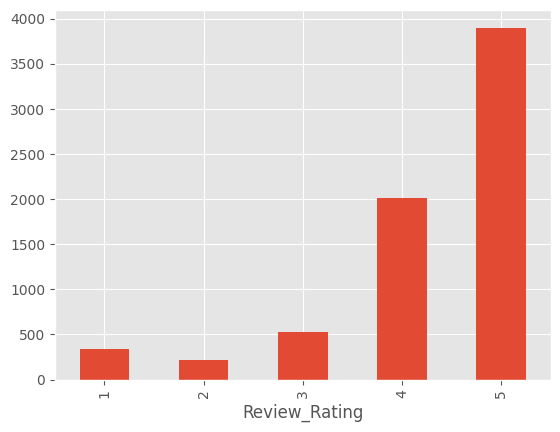

In [12]:
df.groupby('Review_Rating')['Review_Text'].count().plot(kind='bar')

**Check data type**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 6998
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Id      6997 non-null   int64  
 1   Brand_Name      6997 non-null   object 
 2   Review_Text     6997 non-null   object 
 3   Author          6997 non-null   object 
 4   Review_Rating   6997 non-null   int64  
 5   Product_Title   6997 non-null   object 
 6   Product_Rating  6997 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 437.3+ KB


**Check duplicate values**

In [39]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997    False
6998    False
Length: 6997, dtype: bool

# Sentiment Analysis of Lakme Product's Reviews



*   The Review_Rating column of the data contains the ratings given by every reviewer. So let’s have a look at how most of the people rate the Lakme products they buy from Nykaa:



In [119]:
ratings = df["Review_Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=numbers,hole = 0.4)
figure.show()

* So 60% of the reviewers have given 5 out of 5 ratings to the products they buy from Nykaa.

**Cleaning the test**



*   Now Before We Dive into extracting information out of words in text and selected text, let's first clean the data





In [56]:
import nltk
nltk.download('stopwords')

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
port_stem = PorterStemmer()

In [51]:
def stemming(content):

  stemmed_content = re.sub('[^a-zA-Z]',' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

* Make text lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers.

**Output content add into Dataset**

In [52]:
df['stemmed_content'] = df['Review_Text'].apply(stemming)

In [53]:
df.head(6997)

,Product_Id,Brand_Name,Review_Text,Author,Review_Rating,Product_Title,Product_Rating,stemmed_content
0,995305,Lakme,It's a first time that I'm very disappointed w...,Payal Meshram,1,Lakme Eye-conic Eyes Combo,3.9,first time disappoint lakm worthi waterproof s...
1,995305,Lakme,pathetic liner . Dont order . No stay at all ....,Anushka Chawla,1,Lakme Eye-conic Eyes Combo,3.9,pathet liner dont order stay bad experi sumdhm...
2,995305,Lakme,Is ok but the look of the product is perfect. ...,EKRA,4,Lakme Eye-conic Eyes Combo,3.9,ok look product perfect quit good last good ti...
3,995305,Lakme,Liner is smudge and water proof but mascara is...,priyanka srivastav,4,Lakme Eye-conic Eyes Combo,3.9,liner smudg water proof mascara bit smudgi
4,995305,Lakme,This mascara is gives good effect on the eyes ...,preeti kumari,4,Lakme Eye-conic Eyes Combo,3.9,mascara give good effect eye give damn look li...
...,...,...,...,...,...,...,...,...
6994,1017,Lakme,Creamy and smooth. Fragrance is very nice,Resham Kaur,4,Lakme Lip Gloss,4.0,creami smooth fragranc nice
6995,1017,Lakme,Nice gloss moisturising love the flavour n fre...,Jyoti Malik,4,Lakme Lip Gloss,4.0,nice gloss moisturis love flavour n frengranc ...
6996,1017,Lakme,This lipgloss is mesmerising to me it's great ...,N super glam,4,Lakme Lip Gloss,4.0,lipgloss mesmeris great look lip
6997,1017,Lakme,Personally i like thick gloss for there textur...,Shakshi Mehta,4,Lakme Lip Gloss,4.0,person like thick gloss textur one one like th...


**Ploting Product_Id vs Product_Rating**

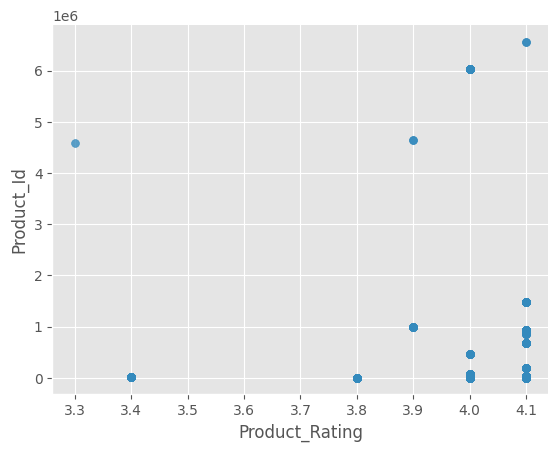

In [48]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Product_Rating', y='Product_Id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



**Let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to visualize the most used words in the reviews column:**



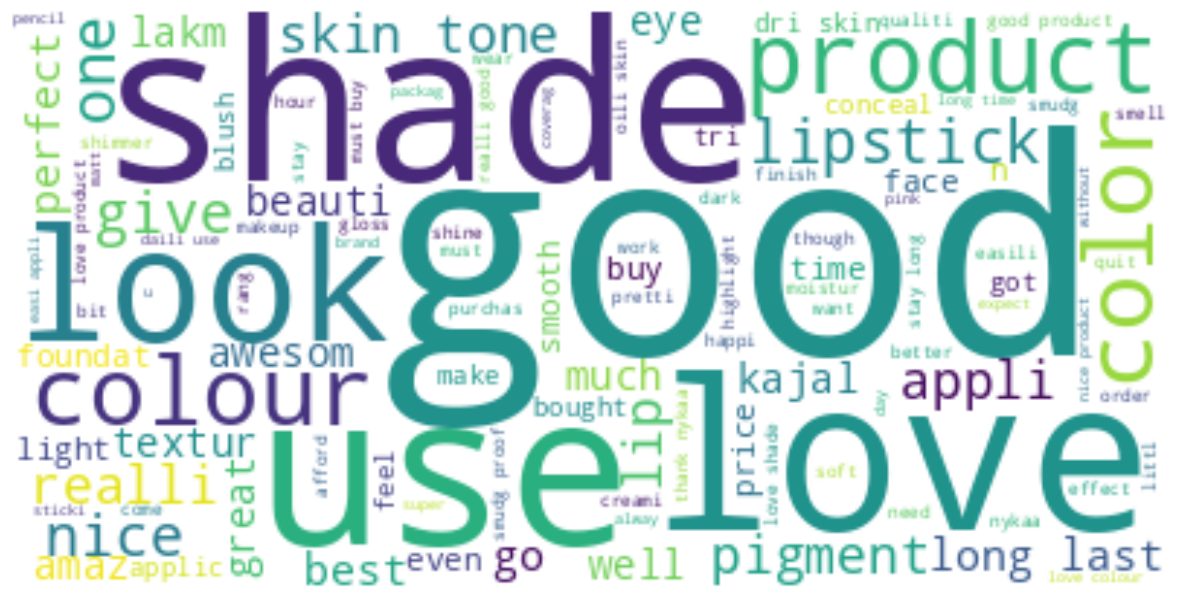

In [57]:
text = " ".join(i for i in df.stemmed_content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Creating sentiment_label as +1 and -1 according to Review_Rating**


In [77]:
df = df[df['Review_Rating'] != 0]

df['sentiment_label'] = df['Review_Rating'].apply(lambda rating : +1 if rating >= 4 else -1)

**Vaders Model Downlod For Sentiment Analysis**

In [84]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [85]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

**Run the polarity score on the entire dataset on Vader**

In [86]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['stemmed_content']
  myid = row['Product_Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/6997 [00:00<?, ?it/s]

**Marge with original DataFrame**

In [87]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Product_Id'})
vaders = vaders.merge(df, how='left')


In [88]:
vaders

,Product_Id,neg,neu,pos,compound,Brand_Name,Review_Text,Author,Review_Rating,Product_Title,Product_Rating,stemmed_content,review_encoded,sentiment_label
0,995305,0.0,0.546,0.454,0.8074,Lakme,It's a first time that I'm very disappointed w...,Payal Meshram,1,Lakme Eye-conic Eyes Combo,3.9,first time disappoint lakm worthi waterproof s...,0,-1
1,995305,0.0,0.546,0.454,0.8074,Lakme,pathetic liner . Dont order . No stay at all ....,Anushka Chawla,1,Lakme Eye-conic Eyes Combo,3.9,pathet liner dont order stay bad experi sumdhm...,0,-1
2,995305,0.0,0.546,0.454,0.8074,Lakme,Is ok but the look of the product is perfect. ...,EKRA,4,Lakme Eye-conic Eyes Combo,3.9,ok look product perfect quit good last good ti...,1,1
3,995305,0.0,0.546,0.454,0.8074,Lakme,Liner is smudge and water proof but mascara is...,priyanka srivastav,4,Lakme Eye-conic Eyes Combo,3.9,liner smudg water proof mascara bit smudgi,1,1
4,995305,0.0,0.546,0.454,0.8074,Lakme,This mascara is gives good effect on the eyes ...,preeti kumari,4,Lakme Eye-conic Eyes Combo,3.9,mascara give good effect eye give damn look li...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,1017,0.0,0.412,0.588,0.6908,Lakme,Creamy and smooth. Fragrance is very nice,Resham Kaur,4,Lakme Lip Gloss,4.0,creami smooth fragranc nice,1,1
6993,1017,0.0,0.412,0.588,0.6908,Lakme,Nice gloss moisturising love the flavour n fre...,Jyoti Malik,4,Lakme Lip Gloss,4.0,nice gloss moisturis love flavour n frengranc ...,1,1
6994,1017,0.0,0.412,0.588,0.6908,Lakme,This lipgloss is mesmerising to me it's great ...,N super glam,4,Lakme Lip Gloss,4.0,lipgloss mesmeris great look lip,1,1
6995,1017,0.0,0.412,0.588,0.6908,Lakme,Personally i like thick gloss for there textur...,Shakshi Mehta,4,Lakme Lip Gloss,4.0,person like thick gloss textur one one like th...,1,1


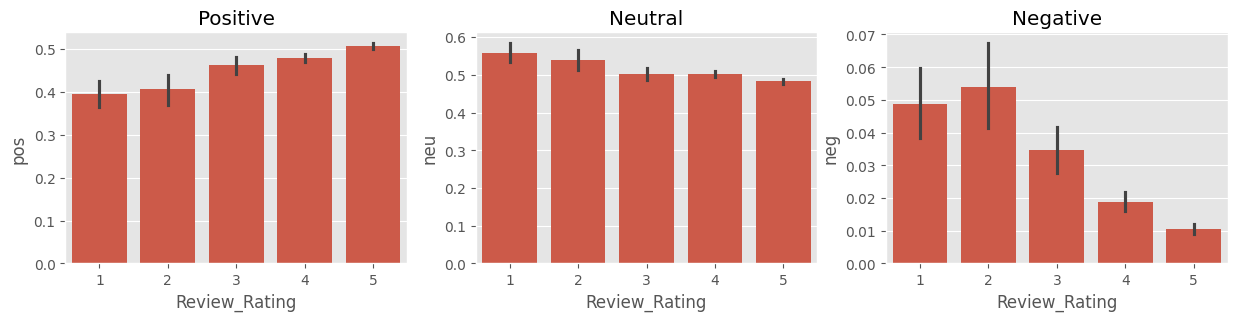

In [105]:
fig, axs = plt.subplots(1, 3, figsize= (15,3))
sns.barplot(data= vaders, x= 'Review_Rating', y= 'pos', ax=axs[0])
sns.barplot(data= vaders, x= 'Review_Rating', y= 'neu', ax=axs[1])
sns.barplot(data= vaders, x= 'Review_Rating', y= 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()



**Roberta Pretrained Model**

In [92]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [93]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

**Run for Roberta Model**

In [94]:
def polarity_scores_roberta(df):
  encoded_test = tokenizer(df, return_tensors='pt')
  output = model(**encoded_test)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]}
  return scores_dict

In [95]:
roberta_result = polarity_scores_roberta('stemmed_content')
roberta_result

{'roberta_neg': 0.12495979,
 'roberta_neu': 0.76602614,
 'roberta_pos': 0.10901409}

* Here I obtain Roberta Negative, Neutral, and Positive Score, which clearly shows that neutral sentiment is more than the positive and negative sentiment from the customer reviews.

**Run the polarity score on the entire dataset**

In [106]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
     text = row['stemmed_content']
     myid = row['Product_Id']
     vader_result = sia.polarity_scores(text)
     roberta_result = polarity_scores_roberta(text)
     both = {**vader_result, **roberta_result}
     res[myid] = both
  except RuntimeError:
    print(f'Broke for id {myid}')


  0%|          | 0/6997 [00:00<?, ?it/s]

In [107]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Product_Id'})
results_df = results_df.merge(df, how='left')

In [108]:
results_df.head()

,Product_Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Brand_Name,Review_Text,Author,Review_Rating,Product_Title,Product_Rating,stemmed_content,review_encoded,sentiment_label
0,995305,0.0,0.546,0.454,0.8074,0.002366,0.065582,0.932052,Lakme,It's a first time that I'm very disappointed w...,Payal Meshram,1,Lakme Eye-conic Eyes Combo,3.9,first time disappoint lakm worthi waterproof s...,0,-1
1,995305,0.0,0.546,0.454,0.8074,0.002366,0.065582,0.932052,Lakme,pathetic liner . Dont order . No stay at all ....,Anushka Chawla,1,Lakme Eye-conic Eyes Combo,3.9,pathet liner dont order stay bad experi sumdhm...,0,-1
2,995305,0.0,0.546,0.454,0.8074,0.002366,0.065582,0.932052,Lakme,Is ok but the look of the product is perfect. ...,EKRA,4,Lakme Eye-conic Eyes Combo,3.9,ok look product perfect quit good last good ti...,1,1
3,995305,0.0,0.546,0.454,0.8074,0.002366,0.065582,0.932052,Lakme,Liner is smudge and water proof but mascara is...,priyanka srivastav,4,Lakme Eye-conic Eyes Combo,3.9,liner smudg water proof mascara bit smudgi,1,1
4,995305,0.0,0.546,0.454,0.8074,0.002366,0.065582,0.932052,Lakme,This mascara is gives good effect on the eyes ...,preeti kumari,4,Lakme Eye-conic Eyes Combo,3.9,mascara give good effect eye give damn look li...,1,1


**Compare Scores between models**

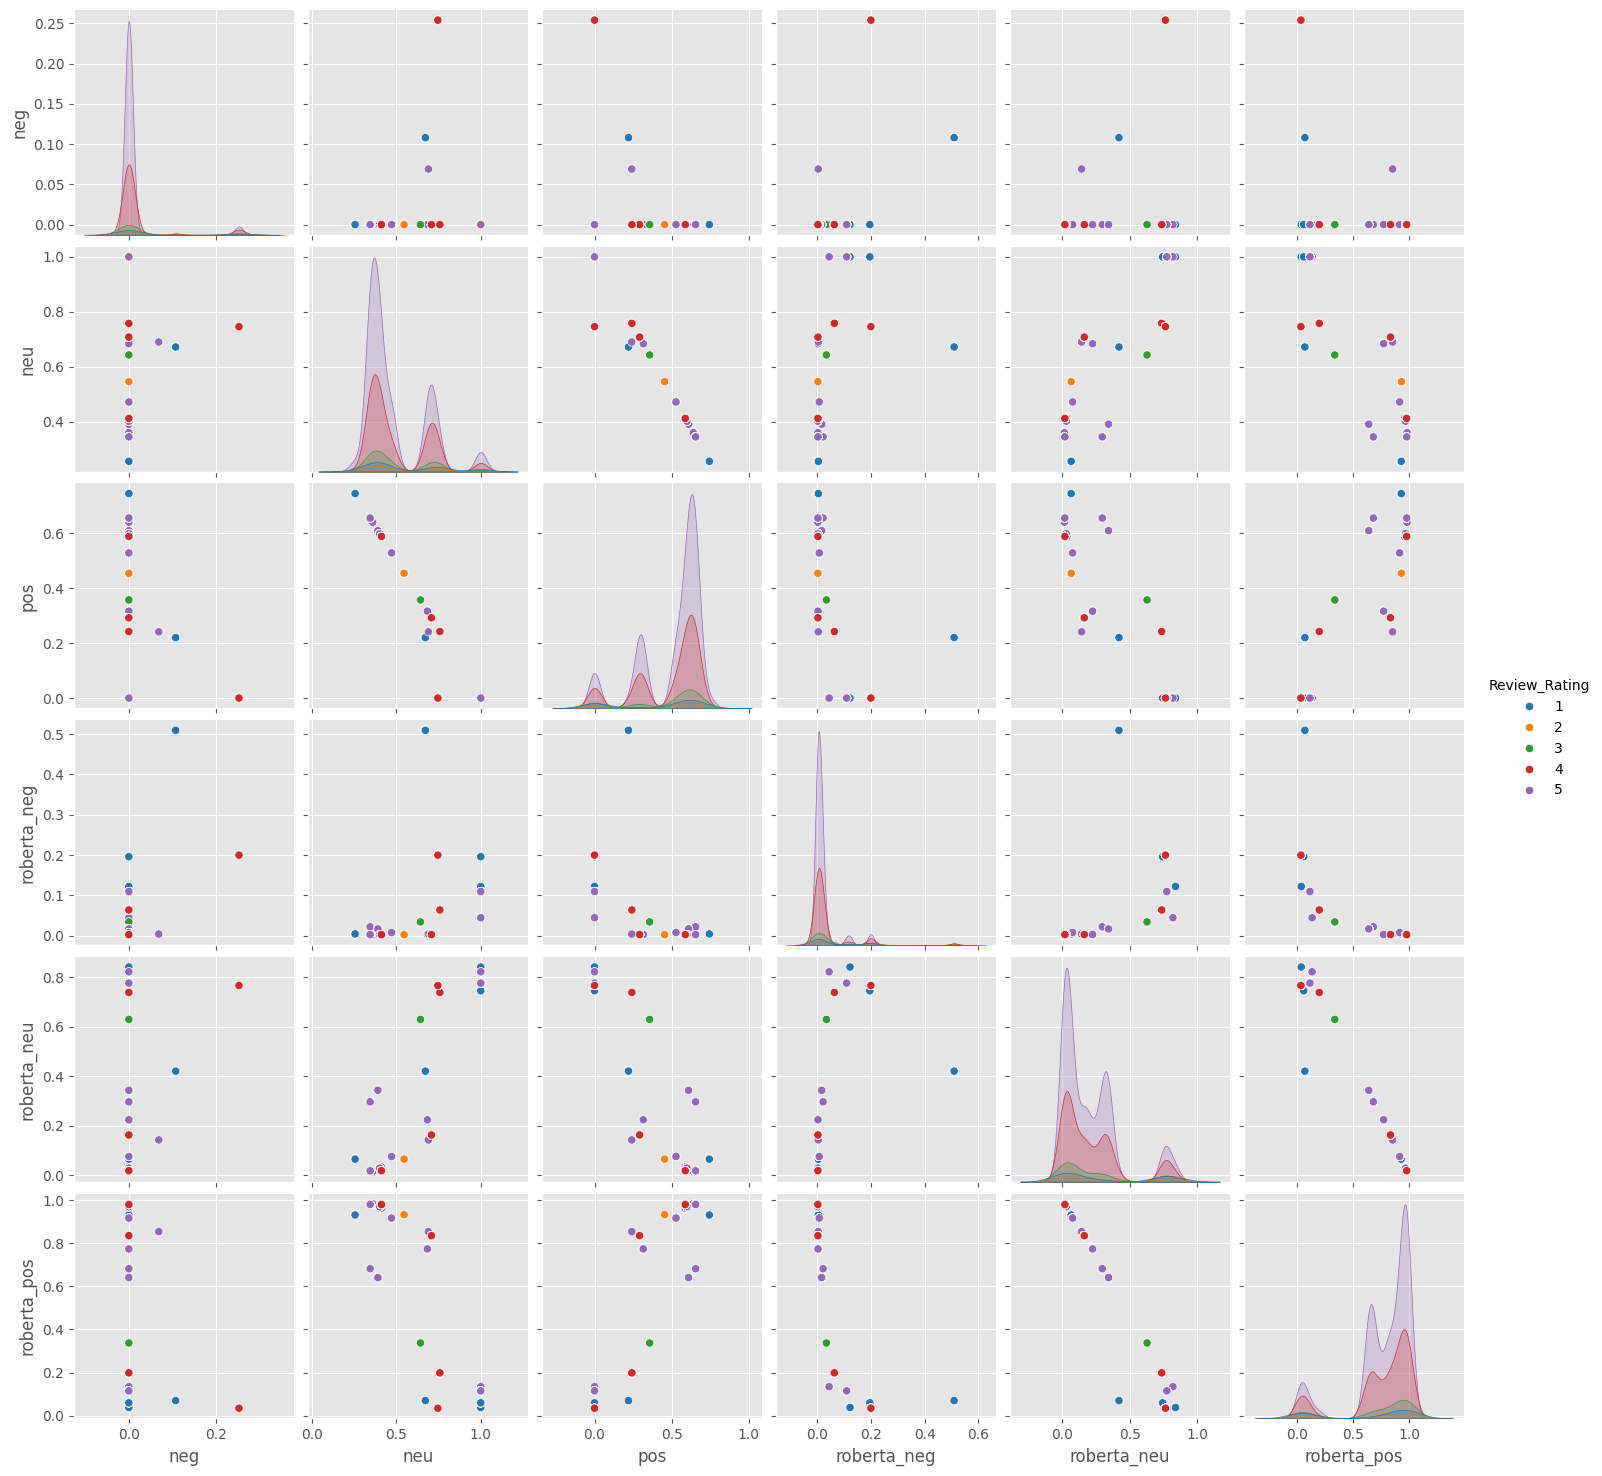

In [109]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue= 'Review_Rating', palette = 'tab10')
plt.show()



---



---


We all know that we cannot pass raw text features in our model. We have to convert them into numeric values. We will use TfidfVectorizer to convert our reviews in numeric features.




**Creates TF-IDF vectorizer and transforms the corpus**

In [110]:
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(df.stemmed_content)
reviews_corpus.shape

(6997, 3330)

* We have built reviews_corpus which are the independent feature in our model.

**Apply label encoding to the Review_Rating column**

In [111]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['review_encoded'] = encoder.fit_transform(df['sentiment_label'])

**Dependent feature**

In [112]:
review = df['review_encoded']
review.shape

(6997,)

**Split the data in train and test**

In [113]:
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,review,test_size=0.20,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (5597, 3330) (5597,)
Test data shape  (1400, 3330) (1400,)


Apply Multinomial Naive Bayes

* Multinomial Naive Bayes is useful for determining the emotional tone of a piece of text, such as a tweet, product review, or customer feedbacks. The model works by computing the probability of each possible sentiment label (positive, negative, neutral) given a piece of text.

In [114]:
clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 0.8428571428571429
Confusion Matrix
[[  16    2]
 [ 218 1164]]


* Here I got an accuracy of 85% by using NaiveBayes.

**Fit the model and predict the output by using  RandomForestClassifier**

In [115]:
clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.8628571428571429
Confusion Matrix
[[  58   16]
 [ 176 1150]]


* Here I got an accuracy of 86% by using  RandomForestClassifier


* After transforming my reviews into vectors using TfidfVectorizer and running both NaiveBayes and RandomForestClassifier, I discovered that RandomForestClassifier outperformed MultinomialNB. I achieved 86%  accuracy with RandomForestClassifier without any parameter adjustment. However, I can still enhance my accuracy by adjusting the parameters of my classifier.

* RandomForestClassifier proved better for sentiment analysis as the model contains labeled dataset of texts with corresponding sentiment labels (positive, negative, neutral).